In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from scipy import stats
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [5]:
#read in the data
df = pd.read_csv("1_8_25_agonist_preliminary_screen_data_for_plot.csv", index_col=0)  # Set the first column as row index

In [6]:
df

,Replicate 1,Replicate 2,Replicate 3,Replicate 4
OxA,73440,148720,172800,51960
Z5052318887,1360,1960,640,240
PV-006669822259,1440,880,800,720
Z2017261328,1640,360,920,840
Z1679037537,3360,1840,600,240
PV-006693400816,4320,3440,4160,2440
PV-006634533361,8520,920,400,680
PV-006687433267,1000,1040,800,640
PV-006700551673,880,640,360,360
PV-005718134777,600,800,1200,560


In [7]:
#get mean and std dev
row_means = df.mean(axis=1)  # Mean of each row
row_stds = df.std(axis=1)    # Standard deviation of each row

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


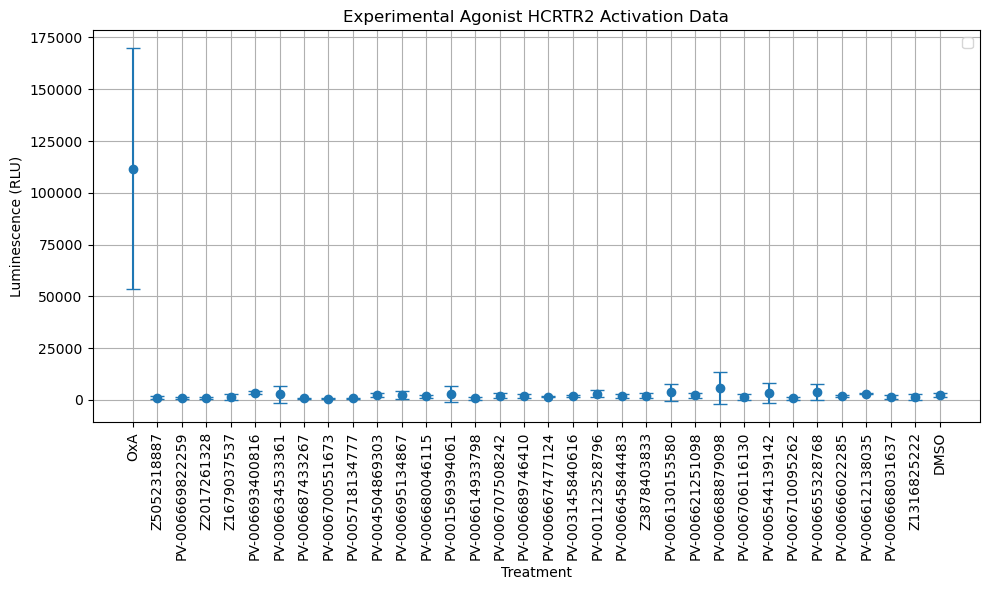

In [10]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(row_means.index, row_means, yerr=row_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Step 1: Load the data
drug_data = pd.read_csv("1_8_25_agonist_preliminary_screen_data_for_plot.csv")

drug_data

,Unnamed: 0,Replicate 1,Replicate 2,Replicate 3,Replicate 4
0,OxA,73440,148720,172800,51960
1,Z5052318887,1360,1960,640,240
2,PV-006669822259,1440,880,800,720
3,Z2017261328,1640,360,920,840
4,Z1679037537,3360,1840,600,240
5,PV-006693400816,4320,3440,4160,2440
6,PV-006634533361,8520,920,400,680
7,PV-006687433267,1000,1040,800,640
8,PV-006700551673,880,640,360,360
9,PV-005718134777,600,800,1200,560


In [ ]:
# Extract drug names (first column) and replicates (columns 2-5)
drug_names = drug_data.iloc[:, 0]  # Drug names are in the first column
replicates = drug_data.iloc[:, 1:]  # Columns 2-5 contain the replicates for each drug

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is the first row of replicates
first_drug_values = replicates.iloc[0]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Plot the drugs with error bars
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color='blue'
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()